In [4]:
from cProfile import label
from statistics import mode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, Flatten
from sklearn.model_selection import GridSearchCV

from scikeras.wrappers import KerasClassifier, KerasRegressor
from datetime import *
from os import *
from dataprep import *
#path='C:\Users\bensa\OneDrive - Microsoft\Documents\MRPLocal\Data'
path= 'C:\\Users\\bensa\\OneDrive - Microsoft\\Documents\\MRPLocal\\Data'

c:\Users\bensa\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Next -- build out table of metrics and the runner
Write the metrics to a CSV for storage
Use an init for the first metric build

Run a few test runs to see what else we need to record.



Experiment Plans

Build out models to compare performance on
Look at hyperparameter tuning
ONce models are adequately baked, then move to A and B below

A Experiment on using different patients inputs and keeping track of metrics
B Experiment on using feature engineering and build out metrics further


Implement Data cleaning from development to the data helper functions
Add in ability to look at a per patient basis
Perhaps start with overall data size, and then with a % set to train v test


In [119]:
## Record the results
Execution_time = []
train_rmse_results = []
test_rmse_results=[]
run_id = []
sample_size=[]
epochs = []
batch_size=[]
optimizer=[]
layers=[]
forecast_distance_perf=[]
prev_readings=[]



In [114]:
for i in range (5):
    ## Simple RNN Model
    ## Initialize
    model_name = 'SimpleRNN optimized - 60 mins'
    num_layers = 3
    epochs_num = 30
    batch_size_set = 200
    optimizer_set = tf.keras.optimizers.Adam(learning_rate=0.01)
    forecast_distance=12
    number_readings=8

    ## Get New Data
    a=DataSampling(path=path)
    a.samplingDF
    X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=3, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
    #a.SampleValidSequences(num_clients=5, test_split=0.3)
    #a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test = np.asarray(X_test)
    y_test = np.asarray(y_test)



    #SETUP THE STACK
    model_rnn = Sequential()
    model_rnn.add(SimpleRNN(150, activation='tanh', input_shape=(number_readings,1)))
    model_rnn.add(Dropout(0.1))
    model_rnn.add(Dense(10))
    model_rnn.add(Dense(1))
    #START THE RUN
    print('\nRunning RNN model...')
    start = datetime.now()

    model_rnn.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    hist = model_rnn.fit(X_train, y_train, epochs=epochs_num, validation_split=0.3, batch_size=batch_size_set)
    train_loss, train_rmse = model_rnn.evaluate(X_train, y_train)
    train_time = (datetime.now()-start).total_seconds()
    print("\ntraining time %s" % train_time)

    #PRINT RESULTS
    print(f'RNN Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
    #Test set results
    test_loss, test_rmse = model_rnn.evaluate(X_test, y_test)
    print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

    #y_pred = model_rnn.predict(X_test)

    Execution_time.append(train_time)
    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    run_id.append(model_name+str(datetime.now()))
    sample_size.append(len(X_train))
    epochs.append(epochs_num)
    batch_size.append(batch_size_set)
    optimizer.append(optimizer_set)
    layers.append(num_layers)
    forecast_distance_perf.append(forecast_distance)
    prev_readings.append(number_readings)

## determine why this is pushing out lists instead of an array


Running RNN model...
Epoch 1/30
31/31 [==============================] - 3s 60ms/step - loss: 22.9479 - root_mean_squared_error: 4.7904 - val_loss: 10.9236 - val_root_mean_squared_error: 3.3051
Epoch 2/30
31/31 [==============================] - 2s 52ms/step - loss: 10.8532 - root_mean_squared_error: 3.2944 - val_loss: 12.9445 - val_root_mean_squared_error: 3.5979
Epoch 3/30
31/31 [==============================] - 2s 51ms/step - loss: 11.2775 - root_mean_squared_error: 3.3582 - val_loss: 10.8207 - val_root_mean_squared_error: 3.2895
Epoch 4/30
31/31 [==============================] - 2s 62ms/step - loss: 10.3978 - root_mean_squared_error: 3.2246 - val_loss: 11.4836 - val_root_mean_squared_error: 3.3887
Epoch 5/30
31/31 [==============================] - 2s 53ms/step - loss: 10.6885 - root_mean_squared_error: 3.2693 - val_loss: 10.5516 - val_root_mean_squared_error: 3.2483
Epoch 6/30
31/31 [==============================] - 2s 53ms/step - loss: 10.4513 - root_mean_squared_error: 3.232

In [7]:
## LSTM Model
## Initialize
model_name = 'LSTM - Personal'
num_layers = 4
epochs_num = 20
batch_size_set = 100
optimizer_set = 'adam'
forecast_distance=6
number_readings=8

## Get New Data
a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=1, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)



#SETUP THE STACK
model_lstm = Sequential()
model_lstm.add(LSTM(150, activation='relu', input_shape=(number_readings, 1),return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(64, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(10, activation='relu'))
model_lstm.add(Dense(1))

#START THE RUN
print('\nRunning LSTM model...')
start = datetime.now()

model_lstm.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model_lstm.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
train_loss, train_rmse = model_lstm.evaluate(X_train, y_train)
train_time = (datetime.now()-start).total_seconds()
print("\ntraining time %s" % train_time)

#PRINT RESULTS
print(f'LSTM Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
#Test set results
test_loss, test_rmse = model_lstm.evaluate(X_test, y_test)
print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

#y_pred = model_rnn.predict(X_test)

Execution_time.append(train_time)
train_rmse_results.append(train_rmse)
test_rmse_results.append(test_rmse)
run_id.append(model_name+str(datetime.now()))
sample_size.append(len(X_train))
epochs.append(epochs_num)
batch_size.append(batch_size_set)
optimizer.append(optimizer_set)
layers.append(num_layers)
forecast_distance_perf.append(forecast_distance)
prev_readings.append(number_readings)




Running LSTM model...
Epoch 1/20
11/11 [==============================] - 4s 96ms/step - loss: 42.9958 - root_mean_squared_error: 6.5571 - val_loss: 29.9209 - val_root_mean_squared_error: 5.4700
Epoch 2/20
11/11 [==============================] - 0s 45ms/step - loss: 14.4209 - root_mean_squared_error: 3.7975 - val_loss: 12.4249 - val_root_mean_squared_error: 3.5249
Epoch 3/20
11/11 [==============================] - 1s 53ms/step - loss: 9.3560 - root_mean_squared_error: 3.0588 - val_loss: 16.2381 - val_root_mean_squared_error: 4.0297
Epoch 4/20
11/11 [==============================] - 0s 43ms/step - loss: 8.2417 - root_mean_squared_error: 2.8708 - val_loss: 9.3973 - val_root_mean_squared_error: 3.0655
Epoch 5/20
11/11 [==============================] - 0s 42ms/step - loss: 7.3981 - root_mean_squared_error: 2.7200 - val_loss: 9.3159 - val_root_mean_squared_error: 3.0522
Epoch 6/20
11/11 [==============================] - 0s 42ms/step - loss: 6.7376 - root_mean_squared_error: 2.5957 - v

In [115]:
for i in range(5):
    ## GRU Model
    ## Initialize
    model_name = 'GRU w Optimized Params - 60 mins'
    num_layers = 4
    epochs_num = 30
    batch_size_set = 200
    optimizer_set = tf.keras.optimizers.Adam(learning_rate=0.01)
    forecast_distance=12
    number_readings=8

    ## Get New Data
    a=DataSampling(path=path)
    a.samplingDF
    X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=3, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
    #a.SampleValidSequences(num_clients=5, test_split=0.3)
    #a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test = np.asarray(X_test)
    y_test = np.asarray(y_test)


    #SETUP THE STACK
    model_gru = Sequential()
    model_gru.add(GRU(60, activation='tanh', input_shape=(number_readings,1), return_sequences=True))
    model_gru.add(Dropout(0.1))
    model_gru.add(GRU(20, activation='tanh'))
    model_gru.add(Dense(10))
    model_gru.add(Dense(1))


    #START THE RUN
    print('\nRunning GRU model...')
    start = datetime.now()

    model_gru.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    hist = model_gru.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
    train_loss, train_rmse = model_gru.evaluate(X_train, y_train)
    train_time = (datetime.now()-start).total_seconds()
    print("\ntraining time %s" % train_time)

    #PRINT RESULTS
    print(f'GRU Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
    #Test set results
    test_loss, test_rmse = model_gru.evaluate(X_test, y_test)
    print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

    #y_pred = model_rnn.predict(X_test)

    Execution_time.append(train_time)
    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    run_id.append(model_name+str(datetime.now()))
    sample_size.append(len(X_train))
    epochs.append(epochs_num)
    batch_size.append(batch_size_set)
    optimizer.append(optimizer_set)
    layers.append(num_layers)
    forecast_distance_perf.append(forecast_distance)
    prev_readings.append(number_readings)



Running GRU model...
Epoch 1/30
85/85 [==============================] - 9s 64ms/step - loss: 22.0825 - root_mean_squared_error: 4.6992 - val_loss: 9.3619 - val_root_mean_squared_error: 3.0597
Epoch 2/30
85/85 [==============================] - 6s 68ms/step - loss: 9.3198 - root_mean_squared_error: 3.0528 - val_loss: 8.1609 - val_root_mean_squared_error: 2.8567
Epoch 3/30
85/85 [==============================] - 6s 70ms/step - loss: 8.5053 - root_mean_squared_error: 2.9164 - val_loss: 8.0947 - val_root_mean_squared_error: 2.8451
Epoch 4/30
85/85 [==============================] - 6s 67ms/step - loss: 8.3166 - root_mean_squared_error: 2.8839 - val_loss: 8.7368 - val_root_mean_squared_error: 2.9558
Epoch 5/30
85/85 [==============================] - 6s 68ms/step - loss: 8.5626 - root_mean_squared_error: 2.9262 - val_loss: 9.0858 - val_root_mean_squared_error: 3.0143
Epoch 6/30
85/85 [==============================] - 5s 63ms/step - loss: 8.1578 - root_mean_squared_error: 2.8562 - val_lo

In [30]:

## CNN RNN
## Initialize
model_name = 'CNN - RNN'
num_layers = 4
epochs_num = 15
batch_size_set = 50
optimizer_set = 'adam'
forecast_distance=6
number_readings=8

## Get New Data
a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=3, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


#SETUP THE STACK

model_cnn_rnn = Sequential()
model_cnn_rnn.add(tf.keras.layers.Conv1D(32, 2, activation='relu', input_shape=(number_readings,1)))
model_cnn_rnn.add(tf.keras.layers.MaxPooling1D((1)))
model_cnn_rnn.add(SimpleRNN(120, activation='relu', return_sequences=True))
#model_cnn_rnn.add(LSTM(10, activation='relu', return_sequences=True))
model_cnn_rnn.add(Flatten())
model_cnn_rnn.add(Dense(1))


#START THE RUN
print('\nRunning CNN RNN model...')
start = datetime.now()

model_cnn_rnn.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model_cnn_rnn.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
train_loss, train_rmse = model_gru.evaluate(X_train, y_train)
train_time = (datetime.now()-start).total_seconds()
print("\ntraining time %s" % train_time)

#PRINT RESULTS
print(f'CNN RNN Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
#Test set results
test_loss, test_rmse = model_cnn_rnn.evaluate(X_test, y_test)
print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

#y_pred = model_rnn.predict(X_test)

Execution_time.append(train_time)
train_rmse_results.append(train_rmse)
test_rmse_results.append(test_rmse)
run_id.append(model_name+str(datetime.now()))
sample_size.append(len(X_train))
epochs.append(epochs_num)
batch_size.append(batch_size_set)
optimizer.append(optimizer_set)
layers.append(num_layers)
forecast_distance_perf.append(forecast_distance)
prev_readings.append(number_readings)



Running CNN RNN model...
Epoch 1/15
403/403 [==============================] - 5s 9ms/step - loss: 7.2989 - root_mean_squared_error: 2.7016 - val_loss: 5.0363 - val_root_mean_squared_error: 2.2442
Epoch 2/15
403/403 [==============================] - 3s 8ms/step - loss: 4.4570 - root_mean_squared_error: 2.1112 - val_loss: 4.7884 - val_root_mean_squared_error: 2.1882
Epoch 3/15
403/403 [==============================] - 4s 9ms/step - loss: 4.2042 - root_mean_squared_error: 2.0504 - val_loss: 4.4610 - val_root_mean_squared_error: 2.1121
Epoch 4/15
403/403 [==============================] - 3s 8ms/step - loss: 4.0461 - root_mean_squared_error: 2.0115 - val_loss: 4.8105 - val_root_mean_squared_error: 2.1933
Epoch 5/15
403/403 [==============================] - 3s 8ms/step - loss: 3.9426 - root_mean_squared_error: 1.9856 - val_loss: 4.4112 - val_root_mean_squared_error: 2.1003
Epoch 6/15
403/403 [==============================] - 4s 9ms/step - loss: 3.9215 - root_mean_squared_error: 1.9803

In [103]:
for i in range (10):
    ## GRU w Features Model
    ## Initialize
    model_name = 'GRU - w Features optimized'
    num_layers = 4
    epochs_num = 30
    batch_size_set = 200
    optimizer_set = 'adam'
    forecast_distance=6
    number_readings=8

    ## Get New Data
    a=DataSampling(path=path)
    a.samplingDF
    X_train,X_test,y_train,y_test = a.SampleValidSequencesMulti(num_clients=4, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
    #a.SampleValidSequences(num_clients=5, test_split=0.3)
    #a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test = np.asarray(X_test)
    y_test = np.asarray(y_test)


    #SETUP THE STACK
    model_gru = Sequential()
    model_gru.add(GRU(150, activation='tanh', input_shape=(number_readings,2), return_sequences=True))
    model_gru.add(Dropout(0.1))
    model_gru.add(GRU(20, activation='relu'))
    model_gru.add(Dense(10))
    model_gru.add(Dense(1))


    #START THE RUN
    print('\nRunning GRU model...')
    start = datetime.now()

    model_gru.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    hist = model_gru.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
    train_loss, train_rmse = model_gru.evaluate(X_train, y_train)
    train_time = (datetime.now()-start).total_seconds()
    print("\ntraining time %s" % train_time)

    #PRINT RESULTS
    print(f'GRU Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
    #Test set results
    test_loss, test_rmse = model_gru.evaluate(X_test, y_test)
    print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

    #y_pred = model_rnn.predict(X_test)

    Execution_time.append(train_time)
    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    run_id.append(model_name+str(datetime.now()))
    sample_size.append(len(X_train))
    epochs.append(epochs_num)
    batch_size.append(batch_size_set)
    optimizer.append(optimizer_set)
    layers.append(num_layers)
    forecast_distance_perf.append(forecast_distance)
    prev_readings.append(number_readings)


Running GRU model...
Epoch 1/30
54/54 [==============================] - 9s 122ms/step - loss: 25.6800 - root_mean_squared_error: 5.0675 - val_loss: 5.3548 - val_root_mean_squared_error: 2.3140
Epoch 2/30
54/54 [==============================] - 6s 115ms/step - loss: 3.9752 - root_mean_squared_error: 1.9938 - val_loss: 4.3298 - val_root_mean_squared_error: 2.0808
Epoch 3/30
54/54 [==============================] - 6s 114ms/step - loss: 3.4911 - root_mean_squared_error: 1.8685 - val_loss: 4.1150 - val_root_mean_squared_error: 2.0285
Epoch 4/30
54/54 [==============================] - 6s 115ms/step - loss: 3.2061 - root_mean_squared_error: 1.7906 - val_loss: 3.8575 - val_root_mean_squared_error: 1.9641
Epoch 5/30
54/54 [==============================] - 6s 112ms/step - loss: 3.0421 - root_mean_squared_error: 1.7442 - val_loss: 3.6566 - val_root_mean_squared_error: 1.9122
Epoch 6/30
54/54 [==============================] - 6s 112ms/step - loss: 2.9093 - root_mean_squared_error: 1.7057 - 

In [104]:
for i in range(10):
    ## Simple RNN Model w Features
    ## Initialize
    model_name = 'SimpleRNN w Features and optimized'
    num_layers = 3
    epochs_num = 30
    batch_size_set = 200
    optimizer_set = tf.keras.optimizers.Adam(learning_rate=0.01)
    forecast_distance=6
    number_readings=8

    ## Get New Data
    a=DataSampling(path=path)
    a.samplingDF
    X_train,X_test,y_train,y_test = a.SampleValidSequencesMulti(num_clients=4, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
    #a.SampleValidSequences(num_clients=5, test_split=0.3)
    #a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test = np.asarray(X_test)
    y_test = np.asarray(y_test)



    #SETUP THE STACK
    model_rnn = Sequential()
    model_rnn.add(SimpleRNN(150, activation='tanh', input_shape=(number_readings,2)))
    model_rnn.add(Dropout(0.1))
    #model_rnn.add(Dense(20))
    model_rnn.add(Dense(10))
    model_rnn.add(Dense(1))
    #START THE RUN
    print('\nRunning RNN model...')
    start = datetime.now()

    model_rnn.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    hist = model_rnn.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
    train_loss, train_rmse = model_rnn.evaluate(X_train, y_train)
    train_time = (datetime.now()-start).total_seconds()
    print("\ntraining time %s" % train_time)

    #PRINT RESULTS
    print(f'RNN Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
    #Test set results
    test_loss, test_rmse = model_rnn.evaluate(X_test, y_test)
    print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

    #y_pred = model_rnn.predict(X_test)

    Execution_time.append(train_time)
    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    run_id.append(model_name+str(datetime.now()))
    sample_size.append(len(X_train))
    epochs.append(epochs_num)
    batch_size.append(batch_size_set)
    optimizer.append(optimizer_set)
    layers.append(num_layers)
    forecast_distance_perf.append(forecast_distance)
    prev_readings.append(number_readings)


Running RNN model...
Epoch 1/30
117/117 [==============================] - 7s 55ms/step - loss: 5.1667 - root_mean_squared_error: 2.2730 - val_loss: 3.7120 - val_root_mean_squared_error: 1.9266
Epoch 2/30
117/117 [==============================] - 7s 57ms/step - loss: 3.7942 - root_mean_squared_error: 1.9479 - val_loss: 3.7456 - val_root_mean_squared_error: 1.9353
Epoch 3/30
117/117 [==============================] - 7s 63ms/step - loss: 3.7829 - root_mean_squared_error: 1.9450 - val_loss: 3.8270 - val_root_mean_squared_error: 1.9563
Epoch 4/30
117/117 [==============================] - 7s 57ms/step - loss: 3.5992 - root_mean_squared_error: 1.8972 - val_loss: 3.9552 - val_root_mean_squared_error: 1.9888
Epoch 5/30
117/117 [==============================] - 8s 65ms/step - loss: 3.6369 - root_mean_squared_error: 1.9071 - val_loss: 3.5905 - val_root_mean_squared_error: 1.8949
Epoch 6/30
117/117 [==============================] - 7s 56ms/step - loss: 3.6911 - root_mean_squared_error: 1.92

In [116]:
metrics_df = pd.DataFrame(list(zip(Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,
prev_readings))
    ,columns=['Execution_time','train_rmse_results','test_rmse_results','run_id','sample_size','epochs','batch_size','optimizer','layers','forecast_distance_perf',
'prev_readings'])

In [117]:
metrics_df

,Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,prev_readings
0,43.953812,2.445894,2.670892,SimpleRNN optimized - personal 60 mins2022-08-...,7214,30,200,<keras.optimizer_v2.adam.Adam object at 0x0000...,3,12,8
1,23.796242,2.703823,2.898907,SimpleRNN optimized - personal 60 mins2022-08-...,3747,30,200,<keras.optimizer_v2.adam.Adam object at 0x0000...,3,12,8
2,21.703608,2.630223,2.363475,SimpleRNN optimized - personal 60 mins2022-08-...,2849,30,200,<keras.optimizer_v2.adam.Adam object at 0x0000...,3,12,8
3,70.514791,2.616661,2.908566,SimpleRNN optimized - personal 60 mins2022-08-...,9809,30,200,<keras.optimizer_v2.adam.Adam object at 0x0000...,3,12,8
4,11.778340,2.109617,2.645050,SimpleRNN optimized - personal 60 mins2022-08-...,1308,30,200,<keras.optimizer_v2.adam.Adam object at 0x0000...,3,12,8
5,106.816886,3.576433,3.521194,GRU w Optimized Params - personal 60 mins2022-...,12002,30,200,<keras.optimizer_v2.adam.Adam object at 0x0000...,4,12,8
6,30.763534,2.470583,2.422383,GRU w Optimized Params - personal 60 mins2022-...,3094,30,200,<keras.optimizer_v2.adam.Adam object at 0x0000...,4,12,8
7,201.645284,2.387519,2.311772,GRU w Optimized Params - personal 60 mins2022-...,23251,30,200,<keras.optimizer_v2.adam.Adam object at 0x0000...,4,12,8
8,73.753674,2.493054,2.622719,GRU w Optimized Params - personal 60 mins2022-...,7600,30,200,<keras.optimizer_v2.adam.Adam object at 0x0000...,4,12,8
9,48.464484,3.936814,4.247368,GRU w Optimized Params - personal 60 mins2022-...,4936,30,200,<keras.optimizer_v2.adam.Adam object at 0x0000...,4,12,8


In [69]:
def buildModel(neurons=150, activation='relu',dropout_rate=0.1):
    ## Simple RNN Model
    ## Initialize
    model_name = 'SimpleRNN - Personal'
    optimizer_set = tf.keras.optimizers.Adam(learning_rate=0.01) #momentum - 0.9?
    forecast_distance=6
    number_readings=8

    ## Get New Data
    a=DataSampling(path=path)
    a.samplingDF


    #SETUP THE STACK
    model_rnn = Sequential()
    model_rnn.add(SimpleRNN(neurons, activation=activation, input_shape=(number_readings,1)))
    model_rnn.add(Dropout(dropout_rate))
    model_rnn.add(Dense(10))
    model_rnn.add(Dense(1))

    
    model_rnn.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model_rnn

a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=2, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


kModel=KerasRegressor(model=buildModel, verbose=0) ##epochs 30 for final

#epochs=10,batch_size=200,

epochs=[15,30,45] #30
batch_size=[100,150,200] #200
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3] #0.01
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9] ##NA
activation_set=['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'] #tanh,relu.softsign
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] #0.1 or 0.2
neurons = [50, 100, 150, 200, 250] #150 or 200
## Activation function / Number Neurons / Optimizer

param_grid = dict(epochs=epochs,batch_size=batch_size)
#param_grid = dict(epochs=epochs,batch_size=batch_size)
#param_grid = dict(model__activation=activation_set)
#param_grid = dict(model__dropout_rate=dropout_rate)
#param_grid = dict(model__neurons=neurons)
grid = GridSearchCV(estimator=kModel, param_grid=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train, y_train)


In [86]:
def buildModelGRU(neurons=150, activation='tanh',dropout_rate=0.1):
    ## Simple RNN Model
    ## Initialize
    model_name = 'GRU'
    optimizer_set = tf.keras.optimizers.Adam(learning_rate=0.01) #momentum - 0.9?
    forecast_distance=6
    number_readings=8




    #SETUP THE STACK
    model_gru = Sequential()
    model_gru.add(GRU(neurons, activation=activation, input_shape=(number_readings,1), return_sequences=True))
    model_gru.add(Dropout(dropout_rate))
    model_gru.add(GRU(20, activation=activation))
    model_gru.add(Dense(10))
    model_gru.add(Dense(1))

    
    model_gru.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model_gru

a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=1, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


kModel=KerasRegressor(model=buildModelGRU, verbose=1, epochs=15, batch_size=200) ##epochs 30 for final

#epochs=10,batch_size=200,

epochs=[30,45] #45
batch_size=[200] #200
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3] #0.01
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9] ##NA
activation_set=['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'] #tanh,relu.softsign
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.8] #0.1 or 0.2
neurons = [50, 100, 150, 200] #150
## Activation function / Number Neurons / Optimizer

#param_grid = dict(epochs=epochs,batch_size=batch_size)
#param_grid = dict(epochs=epochs,batch_size=batch_size)
#param_grid = dict(model__activation=activation_set) #tanh
param_grid = dict(model__dropout_rate=dropout_rate)
#param_grid = dict(model__neurons=neurons)
grid = GridSearchCV(estimator=kModel, param_grid=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train, y_train)


Epoch 1/15
35/35 [==============================] - 11s 193ms/step - loss: 44.5103 - root_mean_squared_error: 6.6716
Epoch 2/15
35/35 [==============================] - 7s 197ms/step - loss: 10.4126 - root_mean_squared_error: 3.2269
Epoch 3/15
35/35 [==============================] - 7s 189ms/step - loss: 6.8943 - root_mean_squared_error: 2.6257
Epoch 4/15
35/35 [==============================] - 7s 198ms/step - loss: 6.6842 - root_mean_squared_error: 2.5854
Epoch 5/15
35/35 [==============================] - 7s 191ms/step - loss: 6.6450 - root_mean_squared_error: 2.5778
Epoch 6/15
35/35 [==============================] - 9s 253ms/step - loss: 6.4227 - root_mean_squared_error: 2.5343
Epoch 7/15
35/35 [==============================] - 8s 227ms/step - loss: 6.4647 - root_mean_squared_error: 2.5426
Epoch 8/15
35/35 [==============================] - 7s 189ms/step - loss: 6.2003 - root_mean_squared_error: 2.4900
Epoch 9/15
35/35 [==============================] - 7s 193ms/step - loss: 6.3

In [87]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -6.230892 using {'model__dropout_rate': 0.1}
-6.654261 (1.184336) with: {'model__dropout_rate': 0.0}
-6.230892 (0.744142) with: {'model__dropout_rate': 0.1}
-6.410074 (0.359668) with: {'model__dropout_rate': 0.2}
-6.330997 (0.742406) with: {'model__dropout_rate': 0.3}
-7.222174 (1.237266) with: {'model__dropout_rate': 0.8}


In [118]:
filename='metrics_full.csv'
metrics_file = os.path.join(path, filename)
## Load all previously generate metrics
all_history = pd.read_csv(metrics_file)
all_history.drop('Unnamed: 0',axis=1,inplace=True)

## Concatenate all metrics
full_metrics=pd.concat([all_history,metrics_df])
full_metrics.to_csv(metrics_file)
## Write complete DF back to original File
#drop recorded results




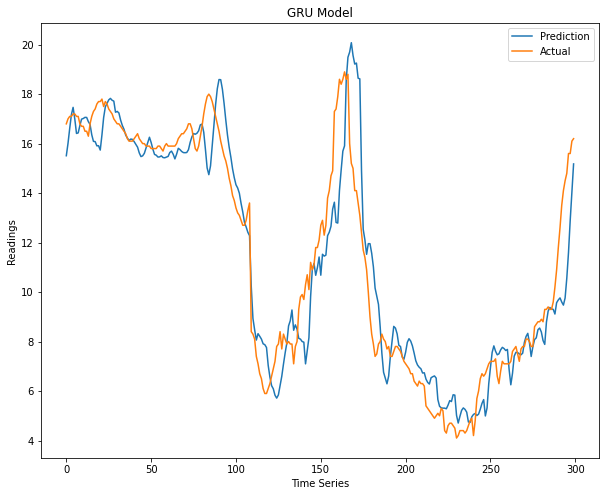

In [15]:

y_pred = model_gru.predict(X_test)
plt.figure(figsize=(10,8))
plt.plot(range(len(y_pred[:300])),y_pred[:300], label='Prediction')
plt.plot(y_test[:300], label='Actual')
plt.xlabel('Time Series')
plt.ylabel('Readings')
plt.title('GRU Model')
plt.legend()
plt.show()

## Charting and Results Assessment

In [6]:
##import the result set

filenameData='MRP_Analysis.csv'
AnalysisFile= os.path.join(path, filenameData)
analysis_DF = pd.read_csv(AnalysisFile)
analysis_DF.drop('Unnamed: 0',axis=1,inplace=True)
#analysis_DF.reset_index(inplace=True)
analysis_DF.head()



,Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,prev_readings,Model Type,Personalised,Feature Engineered,Optimized
0,230.817503,1.704730,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8,SimpleRNN,No,No,No
1,230.817503,1.704730,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8,SimpleRNN,No,No,No
2,65.681792,3.117003,3.205294,SimpleRNN2022-08-01 22:02:54.578203,24944,8,100,adam,3,12,8,SimpleRNN,No,No,No
3,49.711645,2.168479,1.977262,SimpleRNN2022-08-01 22:04:24.851465,41414,3,100,adam,3,6,8,SimpleRNN,No,No,No
4,49.764249,1.772849,1.806986,SimpleRNN2022-08-02 20:26:20.115776,43348,10,25,adam,3,6,6,SimpleRNN,No,No,No


In [123]:
import seaborn as sns

In [9]:
## Filter for initial results
initModelsDF = analysis_DF[ (analysis_DF['Optimized']=='No') 
                            & (analysis_DF['forecast_distance_perf']==6)
                            & (analysis_DF['Personalised']=='No')
                            & (analysis_DF['Feature Engineered']=='No')
                            ]
initModelsDF.head()

#analysis_DF

,Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,prev_readings,Model Type,Personalised,Feature Engineered,Optimized
0,230.817503,1.704730,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8,SimpleRNN,No,No,No
1,230.817503,1.704730,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8,SimpleRNN,No,No,No
3,49.711645,2.168479,1.977262,SimpleRNN2022-08-01 22:04:24.851465,41414,3,100,adam,3,6,8,SimpleRNN,No,No,No
4,49.764249,1.772849,1.806986,SimpleRNN2022-08-02 20:26:20.115776,43348,10,25,adam,3,6,6,SimpleRNN,No,No,No
5,17.432546,2.154079,2.177157,SimpleRNN2022-08-02 20:29:46.125627,56396,8,100,adam,3,6,6,SimpleRNN,No,No,No


In [13]:
initModelsDF.groupby('Model Type')['test_rmse_results','Execution_time'].aggregate(['mean','max','min'])

C:\Users\bensa\AppData\Local\Temp\ipykernel_18096\398905946.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  initModelsDF.groupby('Model Type')['test_rmse_results','Execution_time'].aggregate(['mean','max','min'])


test_rmse_results                     Execution_time              \
                         mean       max       min           mean         max   
Model Type                                                                     
CNN and RNN          2.018090  2.040774  1.995407      45.021899   57.233281   
GRU                  1.581093  1.749079  1.450752      23.514280   42.203948   
LSTM                 2.534181  3.940736  1.664413      92.498006  193.892447   
SimpleRNN            2.008983  3.086725  1.508259     173.805685  854.531749   

                        
                   min  
Model Type              
CNN and RNN  32.810517  
GRU          10.283791  
LSTM         41.534590  
SimpleRNN    11.064166

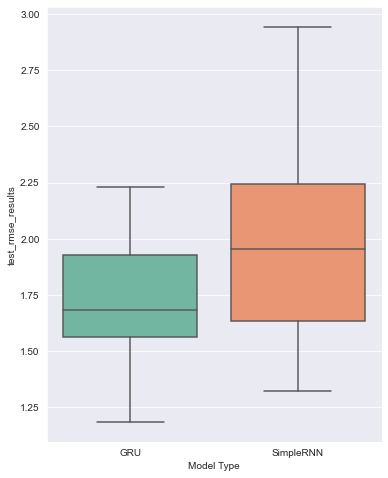

In [134]:
## Plot of Tuned RNN and GRU w optimized parameters and a 30 minute interval



plt.figure(figsize=(6,8))
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.boxplot(data=analysis_DF[(analysis_DF['Optimized']=='Yes') & (analysis_DF['forecast_distance_perf']==6)], x='Model Type', y='test_rmse_results')
plt.show()